<a href="https://colab.research.google.com/github/burakerdal66/Makine_Ogrenmesi_Projeleri/blob/main/EvFiyat_Tahmini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

    numpy (np): Bilimsel hesaplamalar için kullanılan bir kütüphane. Genellikle çok boyutlu diziler ve matris işlemleri için kullanılır.
    pandas (pd): Veri analizi ve manipülasyonu için kullanılan bir kütüphane. Veri setlerini okumak, işlemek ve analiz etmek için kullanılır.
    matplotlib.pyplot (plt): Grafik oluşturmak için kullanılan bir kütüphane. Verilerin görselleştirilmesi ve grafiklerin çizilmesi için kullanılır.
    seaborn (sns): Matplotlib'in üstünde bir arayüz sağlayan bir veri görselleştirme kütüphanesidir. Daha çekici ve bilgilendirici grafikler oluşturmak için kullanılır.
    sklearn.datasets: Scikit-learn kütüphanesinde bulunan veri setlerine erişmek için kullanılır.
    train_test_split fonksiyonu: Veri setini eğitim ve test setlerine ayırmak için kullanılır. Modelin eğitiminde kullanılan veri seti ve modelin doğruluğunu değerlendirmek için kullanılan ayrı bir veri seti oluşturur.
    XGBRegressor sınıfı: XGBoost kütüphanesindeki regresyon algoritmasını uygulamak için kullanılır. XGBoost, ağaç tabanlı bir öğrenme algoritmasıdır ve sıklıkla regresyon ve sınıflandırma problemleri için kullanılır.
    metrics modülü: Scikit-learn kütüphanesinde bulunan metriklerin bir koleksiyonudur. Modelin performansını değerlendirmek için kullanılır.

Kaliforniya Ev Fiyatı Veri Kümesini içe aktarma

In [ ]:
# sklearn.datasets.fetch_california_housing() kullanarak California Konut Fiyatları veri kümesini yükle.
# Bu fonksiyon, scikit-learn kütüphanesinin bir parçasıdır ve veri kümesini indirir ve yükler.
# Bu veri kümesi, ev fiyatlarını tahmin etmek için kullanılabilecek ev özelliklerini içerir.
house_price_dataset = sklearn.datasets.fetch_california_housing()


In [ ]:
print(house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [ ]:
# Veri kümesini Pandas DataFrame'e yükleme
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)

In [ ]:
# DataFrame'imizin ilk 5 satırını yazdırın
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
# hedef (fiyat) sütununu DataFrame'e ekleyin
house_price_dataframe['price'] = house_price_dataset.target

In [ ]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# veri çerçevesindeki satır ve Sütun sayısını kontrol etme
house_price_dataframe.shape

(20640, 9)

In [ ]:
# eksik değerleri kontrol et
house_price_dataframe.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [ ]:
# veri kümesinin istatistiksel ölçümleri
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Veri kümesindeki çeşitli özellikler arasındaki korelasyonu anlama

1. Pozitif Correlation

2. Negatif Correlation

In [ ]:
correlation = house_price_dataframe.corr()

<Axes: >

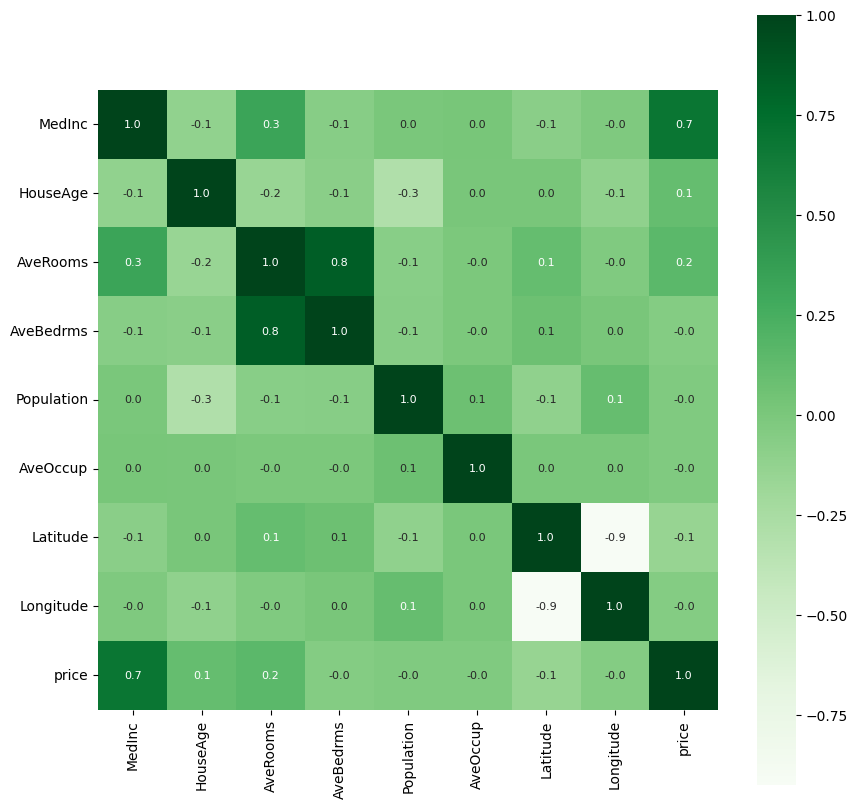

In [ ]:
# Korelasyonu anlamak için bir ısı haritası oluşturmak
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Greens')

Splitting the data and Target

In [ ]:
X = house_price_dataframe.drop(['price'], axis=1)
Y = house_price_dataframe['price']

In [ ]:
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

Verileri Eğitim verilerine ve Test verilerine bölme
---



In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


Model Eğitimi

XGBoost Regressor

In [ ]:
# model yükleniyor
model = XGBRegressor()

In [ ]:
# modeli X_train ile eğitmek
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Değerlendirme

Eğitim verilerine ilişkin tahmin

In [ ]:
# eğitim verileriyle ilgili tahmin doğruluğu
training_data_prediction = model.predict(X_train)

In [ ]:
print(training_data_prediction)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


In [ ]:
# R kare hatası
score_1 = metrics.r2_score(Y_train, training_data_prediction)

#Ortalama Mutlak Hata
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared hatası : ", score_1)
print('Mean Absolute hatası : ', score_2)

R squared hatası :  0.943650140819218
Mean Absolute hatası :  0.1933648700612105


Gerçek Fiyatları ve tahmini fiyatları görselleştirme
---



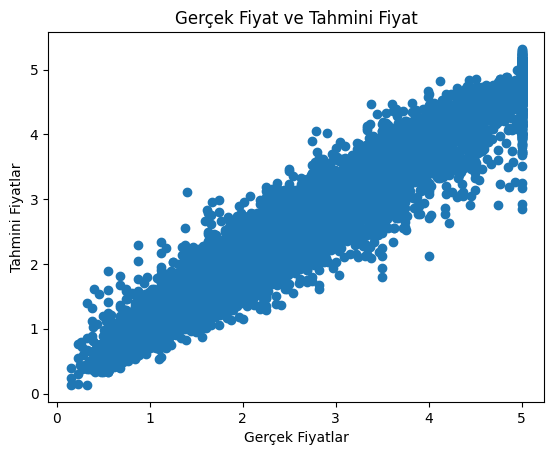

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Gerçek Fiyatlar")
plt.ylabel("Tahmini Fiyatlar")
plt.title("Gerçek Fiyat ve Tahmini Fiyat")
plt.show()

Prediction on Test Data

In [ ]:
# test verileri üzerinde tahmin doğruluğu
test_data_prediction = model.predict(X_test)

In [ ]:
#R kare hatası
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Ortalama Mutlak Hata
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared hatası : ", score_1)
print('Ortalama mutlak hata : ', score_2)

R squared hatası :  0.8338000331788725
Ortalama mutlak hata :  0.3108631800268186
